Importing Libraries

In [97]:
# For data
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# For stationarity test and decomposition
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

# Train, test, validation splits

from sklearn.model_selection import TimeSeriesSplit


from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose 

Reading in CSV/Data Cleaning

In [29]:
df = pd.read_csv("ad_viz_plotval_data.csv")
df.head(5)

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2021,AQS,60070008,3,24,ug/m3 SC,22,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
1,01/02/2021,AQS,60070008,3,21,ug/m3 SC,19,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
2,01/03/2021,AQS,60070008,3,19,ug/m3 SC,18,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
3,01/04/2021,AQS,60070008,3,10,ug/m3 SC,9,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
4,01/05/2021,AQS,60070008,3,12,ug/m3 SC,11,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047


In [30]:
df.dtypes

Date                              object
Source                            object
Site ID                            int64
POC                                int64
Daily Mean PM10 Concentration      int64
UNITS                             object
DAILY_AQI_VALUE                    int64
Site Name                         object
DAILY_OBS_COUNT                    int64
PERCENT_COMPLETE                 float64
AQS_PARAMETER_CODE                 int64
AQS_PARAMETER_DESC                object
CBSA_CODE                        float64
CBSA_NAME                         object
STATE_CODE                         int64
STATE                             object
COUNTY_CODE                        int64
COUNTY                            object
SITE_LATITUDE                    float64
SITE_LONGITUDE                   float64
dtype: object

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
#new data frame with only relevant data

df_PM10 = df[["Date", "Daily Mean PM10 Concentration"]]
df_PM10 = df_PM10.groupby(df_PM10["Date"], as_index=False)["Daily Mean PM10 Concentration"].sum()
df_PM10.head()

,Date,Daily Mean PM10 Concentration
0,2021-01-01,1454
1,2021-01-02,1533
2,2021-01-03,1578
3,2021-01-04,2474
4,2021-01-05,1479


In [33]:
# drop null values
df_PM10.dropna()

,Date,Daily Mean PM10 Concentration
0,2021-01-01,1454
1,2021-01-02,1533
2,2021-01-03,1578
3,2021-01-04,2474
4,2021-01-05,1479
...,...,...
360,2021-12-27,779
361,2021-12-28,595
362,2021-12-29,529
363,2021-12-30,924


EDA

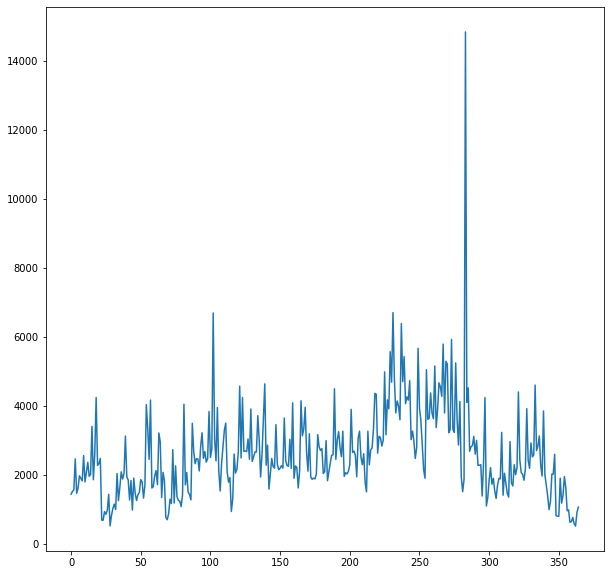

<Figure size 3000x2500 with 0 Axes>

In [34]:
df_PM10['Daily Mean PM10 Concentration'].plot()

figure(figsize=(30, 25), dpi=100)

plt.show()
#PM-10 Over Time

In [70]:
#Multiplicative decomposition

df_new = df_PM10.groupby(df_PM10["Date"])["Daily Mean PM10 Concentration"].sum()
dec_mul = seasonal_decompose(df_new, model = 'multiplicative', extrapolate_trend='freq')

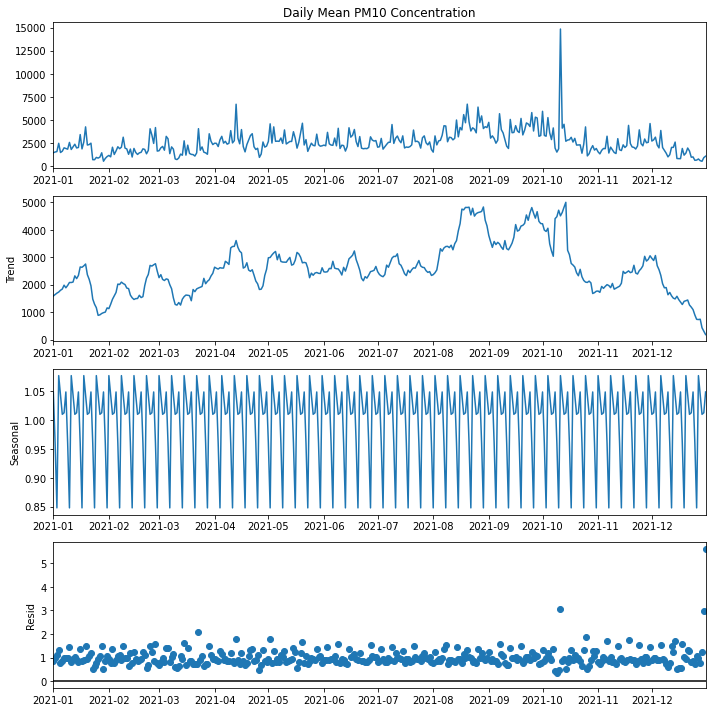

In [36]:
dec_mul.plot()
plt.rcParams.update({'figure.figsize': (10,10)})
plt.show()


In [37]:
#Additive decomposition
dec_add = seasonal_decompose(df_new, model = 'additive', extrapolate_trend='freq')

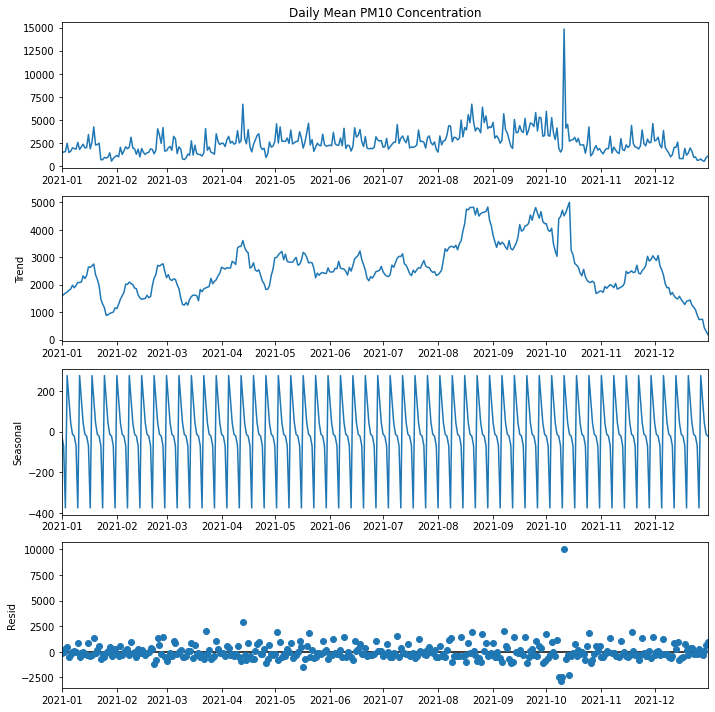

In [38]:
dec_add.plot()
plt.rcParams.update({'figure.figsize': (10,10)})

plt.show()

In [39]:
df_PM10

,Date,Daily Mean PM10 Concentration
0,2021-01-01,1454
1,2021-01-02,1533
2,2021-01-03,1578
3,2021-01-04,2474
4,2021-01-05,1479
...,...,...
360,2021-12-27,779
361,2021-12-28,595
362,2021-12-29,529
363,2021-12-30,924


In [40]:
#ADF test: Null hypothesis: Data is not stationary
result = adfuller(df_PM10['Daily Mean PM10 Concentration'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.6545815280952965
p-value: 0.4546521307906893
Critial Values:
   1%, -3.449336554273722
Critial Values:
   5%, -2.8699055166063085
Critial Values:
   10%, -2.571226758215748


In [41]:
# KPSS Test: Null hypothesis: Data is stationary
result = kpss(df_PM10['Daily Mean PM10 Concentration'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.666982
p-value: 0.016547
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


Checking Stationarity/Differencing

Find number of times we need to difference

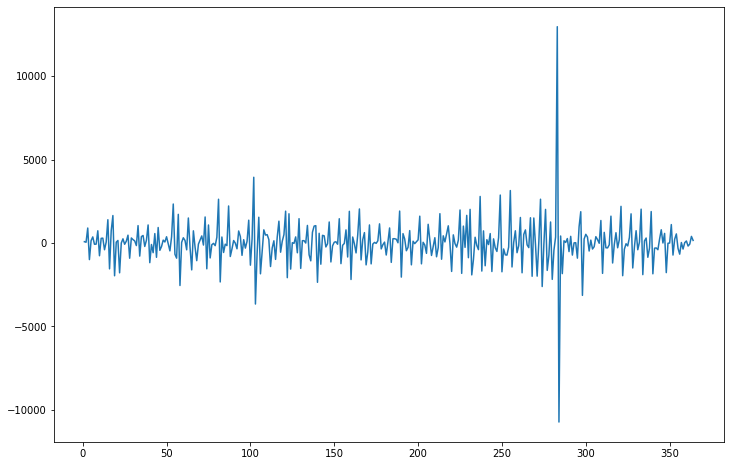

In [42]:
df_PM10["PM10 Difference"] = df_PM10["Daily Mean PM10 Concentration"] - df_PM10["Daily Mean PM10 Concentration"].shift(1)
df_PM10["PM10 Difference"].dropna().plot(figsize=(12, 8))

plt.show()

In [43]:
df_PM10 = df_PM10.dropna()

In [69]:
#ADF test: Null hypothesis: Data is not stationary
result = adfuller(df_PM10["PM10 Difference"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -6.833331390156713
p-value: 1.869456842667254e-09
Critial Values:
   1%, -3.449336554273722
Critial Values:
   5%, -2.8699055166063085
Critial Values:
   10%, -2.571226758215748


In [111]:
len(df_PM10)


364

PACF plot

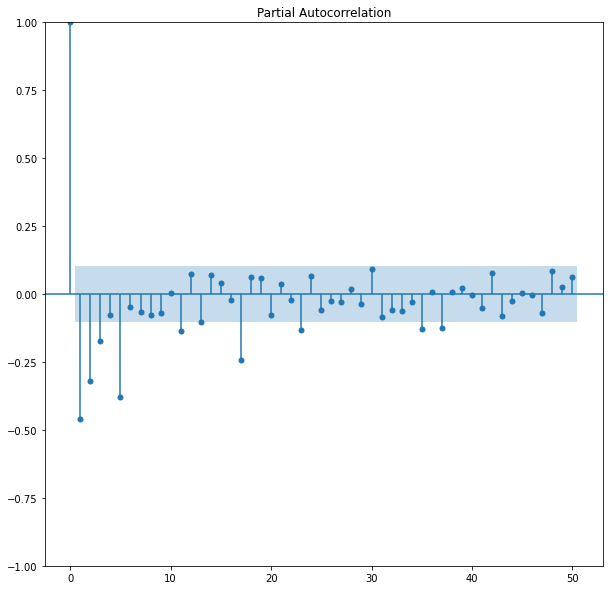

In [86]:
plot_pacf(df_PM10["PM10 Difference"], lags=50, method = "yw")
plt.show()

#1

value for p is 2

ACF plot

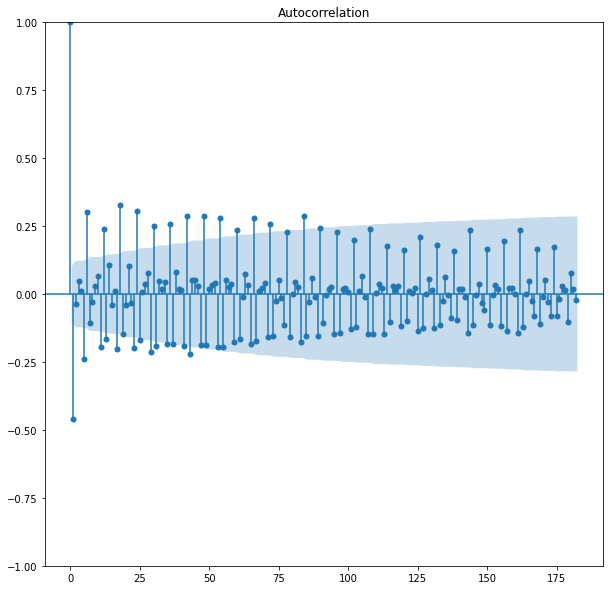

In [98]:
plot_acf(df_PM10["PM10 Difference"], lags=182)
plt.show()

value for q is 2
value for d is 1
(d = 0 would be no differencing) 

Model Building

In [105]:
df_PM10.dtypes

Date                             datetime64[ns]
Daily Mean PM10 Concentration             int64
PM10 Difference                         float64
dtype: object

In [115]:
train = df_PM10[0:218]
test = df_PM10[219:]
train.head()
model = sm.tsa.arima.ARIMA(train['Daily Mean PM10 Concentration'],order=(2,1,2))
model_fit=model.fit()
model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Daily Mean PM10 Concentration   No. Observations:                  218
Model:                            ARIMA(2, 1, 2)   Log Likelihood               -1754.380
Date:                           Sun, 23 Oct 2022   AIC                           3518.760
Time:                                   20:09:36   BIC                           3535.659
Sample:                                        0   HQIC                          3525.587
                                           - 218                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6911      0.003   -256.331      0.000      -0.696      -0.686
ar.L2          0.3089      0.003    115.142      0.000       0.304       0.314
ma.L1          0.0522      0.055      0.943      0.346      -0.056       0.161
ma.L2         -0.9475      0.072    -13.147      0.000      -1.089      -0.806
sigma2      6.038e+05   1.97e-07   3.06e+12      0.000    6.04e+05    6.04e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               236.61
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             1.39
Prob(H) (two-sided):                  0.32   Kurtosis:                         7.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.14e+27. Standard errors may be unstable.
"""

In [128]:
fc = model_fit.forecast(len(test), alpha=0.05)
fc

fc_data = pd.DataFrame(fc)
fc_data.dtypes

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


predicted_mean    float64
dtype: object

In [131]:
error = mean_squared_error(test['Daily Mean PM10 Concentration'], fc_data['predicted_mean'])
error

3028161.5992703377